In [62]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt #for visualization

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-digit-recognizer/train.csv


In [63]:
data = pd.read_csv("/kaggle/input/mnist-digit-recognizer/train.csv")
#data.shape
nan_values = data.isnull().values.any()
#print(nan_values)
data.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
#Separate the data to train and test
data = np.array(data)
row, cols = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]    #takes the first row 
X_dev = data_dev[1:cols] 

data_train = data[1000:row].T #the T is for transpose
Y_train = data_train[0]
X_train = data_train[1:cols]

#normalize the data using 
''' min-max scaling
X_train = (X_train - np.min(X_train, axis=1, keepdims=True) / (np.max(X_train, axis=1, keepdims=True) - np.min(X_train, axis=1, keepdims=True) + 1e-8))
X_dev = (X_dev - np.min(X_dev, axis=1, keepdims=True) / (np.max(X_dev, axis=1, keepdims=True) - np.min(X_dev, axis=1, keepdims=True) + 1e-8))
z-score'''

X_train = (X_train - np.mean(X_train, axis=1, keepdims=True)) / (np.std(X_train, axis=1, keepdims=True) + 1e-8) 
X_dev = (X_dev - np.mean(X_dev, axis=1, keepdims=True)) / (np.std(X_dev, axis=1, keepdims=True) + 1e-8) 


In [65]:
print(nan_values)
#check shape of the data 
#X_dev.shape
#Y_dev.shape

#X_train.shape
#Y_train.shape

False


In [100]:
# Calculate the weights and bias
def init_params():
    # He initialization for ReLU
    #1st hidden layer weight and bias
    
    W1 = np.random.randn(64, 784) * np.sqrt(2. / 784)
    b1 = np.zeros((64, 1))
    
    #2nd hidden layer weight and bias
    W2 = np.random.randn(32, 64) * np.sqrt(2. / 64)
    b2 = np.zeros((32, 1))

    #3rd hidden layer weight and bias
    W3 = np.random.randn(16, 32) * np.sqrt(2. / 32)
    b3 = np.zeros((16, 1))
    
    #output layer weight and bias
    W4 = np.random.randn(10, 16) * np.sqrt(2. / 16)
    b4 = np.zeros((10, 1))
    
    # Batch normalization parameters
    gamma1 = np.ones((64, 1))
    beta1_bn = np.zeros((64, 1))
    gamma2 = np.ones((32, 1))
    beta2_bn = np.zeros((32, 1))
    gamma3 = np.ones((16, 1))
    beta3_bn = np.zeros((16, 1))
    
    return W1, b1, W2, b2, W3, b3, W4, b4, gamma1, beta1_bn, gamma2, beta2_bn, gamma3, beta3_bn

In [152]:
def batch_norm(X, gamma, beta, eps=1e-8):
    mean = np.mean(X, axis=1, keepdims=True)
    var = np.var(X, axis=1, keepdims=True)
    X_norm = (X - mean) / np.sqrt(var + eps)
    out = gamma * X_norm + beta
    return out, mean, var


NameError: name 'X' is not defined

In [102]:
# The ReLU function which returns z if Z>0 else returns 0
def ReLU(Z):
    return np.maximum(Z, 0)

# Softmax function with stability improvement
def SoftMax(Z):
    Z -= np.max(Z, axis=0, keepdims=True)   #this gives probability since it no. at that row / total no. in the column
    expZ = np.exp(Z)
    return expZ / (np.sum(expZ, axis=0, keepdims=True) + 1e-17)

In [103]:
def forward_prop(W1, b1, W2, b2, W3, b3, W4, b4, gamma1, beta1_bn, gamma2, beta2_bn, gamma3, beta3_bn, X):
    Z1 = W1.dot(X) + b1
    A1_norm, mean1, var1 = batch_norm(Z1, gamma1, beta1_bn)
    A1 = ReLU(A1_norm)
    
    Z2 = W2.dot(A1) + b2
    A2_norm, mean2, var2 = batch_norm(Z2, gamma2, beta2_bn)
    A2 = ReLU(A2_norm)
    
    Z3 = W3.dot(A2) + b3
    A3_norm, mean3, var3 = batch_norm(Z3, gamma3, beta3_bn)
    A3 = ReLU(A3_norm)
    
    Z4 = W4.dot(A3) + b4
    A4 = SoftMax(Z4)
    
    cache = (Z1, A1_norm, A1, mean1, var1, 
             Z2, A2_norm, A2, mean2, var2, 
             Z3, A3_norm, A3, mean3, var3, 
             Z4, A4)
    
    return A4, cache

In [151]:
#The One-Hot Encoder
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1)) # creates a y.size * max value in y matrix with 0 values
    one_hot_Y[np.arange(Y.size), Y] = 1  # example if y=[0, 1, 2, 3] then one_hot_Y[[0, 1, 2, 3], [0, 1, 2, 3]] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
#     """
#     the one_hot_Y  before transpose looks like this with that example
    
#     [[1. 0. 0.]
#      [0. 1. 0.]
#      [0. 0. 1.]
#      [0. 1. 0.]]
#     since We then update the matrix at these positions:

#     (0, 0) -> 1
#     (1, 1) -> 1
#     (2, 2) -> 1
#     (3, 1) -> 1
#     """

In [105]:
# Derivative of ReLU
def deriv_ReLU(Z):
    return Z > 0

In [106]:
# Back Propagation
def back_prop(cache, W1, W2, W3, W4, Y, X, lambda_reg):
    m = X.shape[1]
    (Z1, A1_norm, A1, mean1, var1, 
     Z2, A2_norm, A2, mean2, var2, 
     Z3, A3_norm, A3, mean3, var3, 
     Z4, A4) = cache  # Unpack A4 from the cache
    
    one_hot_Y = one_hot(Y)
    
    dZ4 = A4 - one_hot_Y
    dW4 = (1/m) * dZ4.dot(A3.T) + (lambda_reg/m) * W4
    db4 = (1/m) * np.sum(dZ4, axis=1, keepdims=True)
    
    dA3 = W4.T.dot(dZ4)
    dZ3 = dA3 * deriv_ReLU(A3_norm)
    dW3 = (1/m) * dZ3.dot(A2.T) + (lambda_reg/m) * W3
    db3 = (1/m) * np.sum(dZ3, axis=1, keepdims=True)
    dgamma3 = (1/m) * np.sum(dZ3 * A3_norm, axis=1, keepdims=True)
    dbeta3 = (1/m) * np.sum(dZ3, axis=1, keepdims=True)
    
    dA2 = W3.T.dot(dZ3)
    dZ2 = dA2 * deriv_ReLU(A2_norm)
    dW2 = (1/m) * dZ2.dot(A1.T) + (lambda_reg/m) * W2
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dgamma2 = (1/m) * np.sum(dZ2 * A2_norm, axis=1, keepdims=True)
    dbeta2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    
    dA1 = W2.T.dot(dZ2)
    dZ1 = dA1 * deriv_ReLU(A1_norm)
    dW1 = (1/m) * dZ1.dot(X.T) + (lambda_reg/m) * W1
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    dgamma1 = (1/m) * np.sum(dZ1 * A1_norm, axis=1, keepdims=True)
    dbeta1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    return dW4, db4, dW3, db3, dW2, db2, dW1, db1, dgamma3, dbeta3, dgamma2, dbeta2, dgamma1, dbeta1

In [107]:
#OPTIMIZATION USING ADAM 
def update_params_adam(W1, b1, W2, b2, W3, b3, W4, b4, 
                       gamma1, beta1_bn, gamma2, beta2_bn, gamma3, beta3_bn,
                       dW4, db4, dW3, db3, dW2, db2, dW1, db1, 
                       dgamma3, dbeta3, dgamma2, dbeta2, dgamma1, dbeta1,
                       m_W1, m_b1, m_W2, m_b2, m_W3, m_b3, m_W4, m_b4,
                       m_gamma1, m_beta1, m_gamma2, m_beta2, m_gamma3, m_beta3,
                       v_W1, v_b1, v_W2, v_b2, v_W3, v_b3, v_W4, v_b4,
                       v_gamma1, v_beta1, v_gamma2, v_beta2, v_gamma3, v_beta3,
                       t, alpha, beta1, beta2, epsilon):
    
    # Adam update for W1 and b1
    m_W1, v_W1, W1 = adam_update(m_W1, v_W1, dW1, W1, t, alpha, beta1, beta2, epsilon)
    m_b1, v_b1, b1 = adam_update(m_b1, v_b1, db1, b1, t, alpha, beta1, beta2, epsilon)
    
    # Adam update for W2 and b2
    m_W2, v_W2, W2 = adam_update(m_W2, v_W2, dW2, W2, t, alpha, beta1, beta2, epsilon)
    m_b2, v_b2, b2 = adam_update(m_b2, v_b2, db2, b2, t, alpha, beta1, beta2, epsilon)
    
    # Adam update for W3 and b3
    m_W3, v_W3, W3 = adam_update(m_W3, v_W3, dW3, W3, t, alpha, beta1, beta2, epsilon)
    m_b3, v_b3, b3 = adam_update(m_b3, v_b3, db3, b3, t, alpha, beta1, beta2, epsilon)
    
    # Adam update for W4 and b4
    m_W4, v_W4, W4 = adam_update(m_W4, v_W4, dW4, W4, t, alpha, beta1, beta2, epsilon)
    m_b4, v_b4, b4 = adam_update(m_b4, v_b4, db4, b4, t, alpha, beta1, beta2, epsilon)
    
    # Adam updates for gamma and beta parameters
    m_gamma3, v_gamma3, gamma3 = adam_update(m_gamma3, v_gamma3, dgamma3, gamma3, t, alpha, beta1, beta2, epsilon)
    m_beta3, v_beta3, beta3_bn = adam_update(m_beta3, v_beta3, dbeta3, beta3_bn, t, alpha, beta1, beta2, epsilon)
    
    m_gamma2, v_gamma2, gamma2 = adam_update(m_gamma2, v_gamma2, dgamma2, gamma2, t, alpha, beta1, beta2, epsilon)
    m_beta2, v_beta2, beta2_bn = adam_update(m_beta2, v_beta2, dbeta2, beta2_bn, t, alpha, beta1, beta2, epsilon)
    
    m_gamma1, v_gamma1, gamma1 = adam_update(m_gamma1, v_gamma1, dgamma1, gamma1, t, alpha, beta1, beta2, epsilon)
    m_beta1, v_beta1, beta1_bn = adam_update(m_beta1, v_beta1, dbeta1, beta1_bn, t, alpha, beta1, beta2, epsilon)
    
    return (W1, b1, W2, b2, W3, b3, W4, b4, 
            gamma1, beta1_bn, gamma2, beta2_bn, gamma3, beta3_bn,
            m_W1, m_b1, m_W2, m_b2, m_W3, m_b3, m_W4, m_b4,
            m_gamma1, m_beta1, m_gamma2, m_beta2, m_gamma3, m_beta3,
            v_W1, v_b1, v_W2, v_b2, v_W3, v_b3, v_W4, v_b4,
            v_gamma1, v_beta1, v_gamma2, v_beta2, v_gamma3, v_beta3)

In [108]:
def adam_update(m, v, grad, param, t, alpha, beta1, beta2, epsilon):
    m = beta1 * m + (1 - beta1) * grad
    v = beta2 * v + (1 - beta2) * np.square(grad)
    m_corrected = m / (1 - beta1**t)
    v_corrected = v / (1 - beta2**t)
    param -= alpha * m_corrected / (np.sqrt(v_corrected) + epsilon)
    return m, v, param

In [109]:
#Check for Nan or Inf values
def check_data(data):
    if np.any(np.isnan(data)) or np.any(np.isinf(data)):
        print("Data contains Nan or Inf values!")
        
def check_nans(*arrays):
    for array in arrays:
        if np.any(np.isnan(array)) or np.any(np.isinf(array)):
            print("Nan or Inf detected!")

In [110]:
check_data(X_train) 
check_data(Y_train)

In [111]:
def get_predictions(A4):
    return np.argmax(A4, axis=0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

In [112]:
def gradient_descent(X, Y, iterations, alpha, lambda_reg=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
    W1, b1, W2, b2, W3, b3, W4, b4, gamma1, beta1_bn, gamma2, beta2_bn, gamma3, beta3_bn = init_params()
    
    # Initialize Adam parameters for all weights, biases, gammas, and betas
    params = [W1, b1, W2, b2, W3, b3, W4, b4, gamma1, beta1_bn, gamma2, beta2_bn, gamma3, beta3_bn]
    m_params = [np.zeros_like(param) for param in params]
    v_params = [np.zeros_like(param) for param in params]
    
    for i in range(1, iterations + 1):
        A4, cache = forward_prop(W1, b1, W2, b2, W3, b3, W4, b4, gamma1, beta1_bn, gamma2, beta2_bn, gamma3, beta3_bn, X)
        
        gradients = back_prop(cache, W1, W2, W3, W4, Y, X, lambda_reg)
        
        params = update_params_adam(W1, b1, W2, b2, W3, b3, W4, b4, 
                                    gamma1, beta1_bn, gamma2, beta2_bn, gamma3, beta3_bn,
                                    *gradients, *m_params, *v_params,
                                    i, alpha, beta1, beta2, epsilon)

        W1, b1, W2, b2, W3, b3, W4, b4, gamma1, beta1_bn, gamma2, beta2_bn, gamma3, beta3_bn, *m_v_params = params
        
        # Update m_params and v_params lists
        m_params = m_v_params[:len(m_params)]
        v_params = m_v_params[len(m_params):]
        
        if i % 10 == 0:
            predictions = get_predictions(A4)
            accuracy = get_accuracy(predictions, Y)
            print(f"Iteration: {i}, Accuracy: {accuracy}")
    
    return W1, b1, W2, b2, W3, b3, W4, b4, gamma1, beta1_bn, gamma2, beta2_bn, gamma3, beta3_bn

In [137]:
# To start the training
W1, b1, W2, b2, W3, b3, W4, b4, gamma1, beta1_bn, gamma2, beta2_bn, gamma3, beta3_bn = gradient_descent(X_train, Y_train, iterations=1000, alpha=0.005, lambda_reg=0.04)

Iteration: 10, Accuracy: 0.7296585365853658
Iteration: 20, Accuracy: 0.771
Iteration: 30, Accuracy: 0.7697804878048781
Iteration: 40, Accuracy: 0.7590731707317073
Iteration: 50, Accuracy: 0.7796341463414634
Iteration: 60, Accuracy: 0.7802682926829269
Iteration: 70, Accuracy: 0.777219512195122
Iteration: 80, Accuracy: 0.7270731707317073
Iteration: 90, Accuracy: 0.7199024390243902
Iteration: 100, Accuracy: 0.724170731707317
Iteration: 110, Accuracy: 0.7612682926829268
Iteration: 120, Accuracy: 0.7692682926829268
Iteration: 130, Accuracy: 0.7741463414634147
Iteration: 140, Accuracy: 0.778219512195122
Iteration: 150, Accuracy: 0.7840731707317073
Iteration: 160, Accuracy: 0.7529512195121951
Iteration: 170, Accuracy: 0.7605121951219512
Iteration: 180, Accuracy: 0.8045121951219513
Iteration: 190, Accuracy: 0.8126097560975609
Iteration: 200, Accuracy: 0.8186829268292682
Iteration: 210, Accuracy: 0.8232682926829268
Iteration: 220, Accuracy: 0.8266585365853658
Iteration: 230, Accuracy: 0.8294878

In [160]:
def make_predictions(X, W1, b1, W2, b2, W3, b3, W4, b4, gamma1, beta1_bn, gamma2, beta2_bn, gamma3, beta3_bn):
    A4, _ = forward_prop(W1, b1, W2, b2, W3, b3, W4, b4, gamma1, beta1_bn, gamma2, beta2_bn, gamma3, beta3_bn, X)
    predictions = get_predictions(A4)
    return predictions

def test_prediction(W1, b1, W2, b2, W3, b3, W4, b4, gamma1, beta1_bn, gamma2, beta2_bn, gamma3, beta3_bn, index):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2, W3, b3, W4, b4, gamma1, beta1_bn, gamma2, beta2_bn, gamma3, beta3_bn)
    
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255  # Adjust the reshape dimensions based on your dataset
    plt.gray()
    plt.imshow(current_image, interpolation="nearest")
    plt.show()

Prediction:  [5]
Label:  9


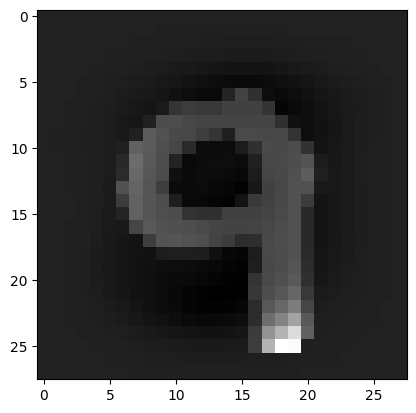

In [172]:
test_prediction(W1, b1, W2, b2, W3, b3, W4, b4, gamma1, beta1_bn, gamma2, beta2_bn, gamma3, beta3_bn, 6)

In [171]:
def predict_test_data(W1, b1, W2, b2, W3, b3, W4, b4, gamma1, beta1_bn, gamma2, beta2_bn, gamma3, beta3_bn, X_dev):
    A4, _ = forward_prop(W1, b1, W2, b2, W3, b3, W4, b4, gamma1, beta1_bn, gamma2, beta2_bn, gamma3, beta3_bn, X_dev)
    predictions = get_predictions(A4)
    return predictions

In [164]:
# Make predictions on test data
test_predictions = predict_test_data(W1, b1, W2, b2, W3, b3, W4, b4, gamma1, beta1_bn, gamma2, beta2_bn, gamma3, beta3_bn, X_dev)


In [173]:
test_accuracy = get_accuracy(test_predictions, Y_dev)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.871
